# P2
Written by Babak Hosseini Parsa Ahmadi 810101609, Mohtasham 810101408 and Mahdy Naeini 810101536\

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

sns.set_theme()
random_state=42

In [2]:
df=pd.read_csv('phones.csv')
df=df.drop(['Unnamed: 0'],axis=1)

In [16]:
df.head()

,Model,Release Data,Weight,Dimensions,Brand,Seller,Sim Card Description,Sim Card Type,Body Structure,Key Features,...,خاکستری,آبی,نقره ای,قرمز,مسی,سفید,ذغالی,Number of Availabler Colors,Log Price No Discount,Category num
0,Redmi Note 13 4G,2024/1/15,188.5,8×75.6×162.3 میلی متر,Xiaomi,دیجی کالا,سایز نانو (8.8 × 12.3 میلی متر),NaN,NaN,رابط کاربری MIUI 14,...,0,1,0,0,0,0,0,3,6.986727,NaN
1,Redmi Note 13 4G,2024/1/15,188.5,8×75.6×162.3 میلی متر,Xiaomi,دیجی کالا,سایز نانو (8.8 × 12.3 میلی متر),NaN,NaN,رابط کاربری MIUI 14,...,0,1,0,0,0,0,0,3,6.991182,NaN
2,Redmi Note 13 4G,2024/1/15,188.5,8×75.6×162.3 میلی متر,Xiaomi,فیروزه همراه اسپادانا,سایز نانو (8.8 × 12.3 میلی متر),NaN,NaN,رابط کاربری MIUI 14,...,0,1,0,0,0,0,0,3,6.995811,NaN
3,Redmi Note 13 4G,2024/1/15,188.5,8×75.6×162.3 میلی متر,Xiaomi,اسمارت تکنولوژی قشم,سایز نانو (8.8 × 12.3 میلی متر),NaN,NaN,رابط کاربری MIUI 14,...,0,1,0,0,0,0,0,3,6.999957,NaN
4,Redmi Note 13 4G,2024/1/15,188.5,8×75.6×162.3 میلی متر,Xiaomi,اسمارت تکنولوژی قشم,سایز نانو (8.8 × 12.3 میلی متر),NaN,NaN,رابط کاربری MIUI 14,...,0,1,0,0,0,0,0,3,6.999957,NaN


# Class Creation

In [17]:
class MyRegressor:
    def fit(self,X,y):
        pass

    def predict(self,X):
        pass
    
    def get_root_mean_square_error(self,predicted_values, actual_values):
        return (np.sqrt((predicted_values-actual_values)**2).mean())
    
    def get_r2_score(self,predicted_values, actual_values):
        return 1-((predicted_values-actual_values)**2).sum()/((actual_values-actual_values.mean())**2).sum()
    
    def plot_line(self,predicted_values, actual_values):
        plt.scatter(actual_values, predicted_values, color='blue')
        t=np.arange(actual_values.min(),actual_values.max()+1)
        plt.plot(t,t, color='red')
        plt.show()

In [18]:
class MyRandomForestRegressor(MyRegressor):
    def __init__(self) -> None:
        self.model = RandomForestRegressor()

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

In [19]:
class MySVMRegressor(MyRegressor):
    def __init__(self) -> None:
        self.model = SVR()

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

In [20]:
df[df.select_dtypes(include=np.number).columns].corr()[
    'Price No Discount'].sort_values(ascending=False)

Price No Discount        1.000000
Log Price No Discount    0.767380
OS Num                   0.708085
Category num             0.673683
طلایی                    0.631099
                           ...   
آبی تیره                      NaN
آبی نیلی                      NaN
سرمه ای روشن                  NaN
قرمز                          NaN
ذغالی                         NaN
Name: Price No Discount, Length: 74, dtype: float64

In [21]:
df=pd.concat([df,pd.get_dummies(df['Seller'], drop_first=False)],axis=1)
df = pd.concat([df, pd.get_dummies(df['City'], drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Category'], drop_first=False)], axis=1)

In [22]:
X, y = df[df.columns.difference(['Price No Discount'])], df['Price No Discount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=random_state)

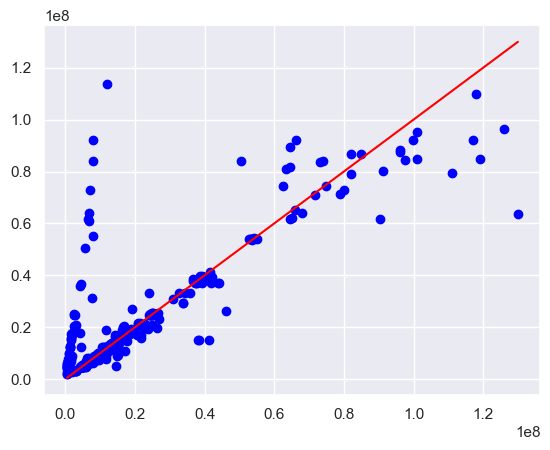

R2 score: 0.7219036157468046
RMSE: 3579496.492892325


In [23]:
cols = df.select_dtypes(include=[np.number, bool]).columns.difference(
    ['Price No Discount', 'Log Price No Discount', 'Sim Card Type', 'Warranty time', 'Category num','DAR'])
random_forest_model=MyRandomForestRegressor()
random_forest_model.fit(X_train[cols], y_train)
predictions = random_forest_model.predict(X_test[cols])
random_forest_model.plot_line(predictions,y_test)
print(f'R2 score: {random_forest_model.get_r2_score(predictions,y_test)}')
print(f'RMSE: {random_forest_model.get_root_mean_square_error(predictions,y_test)}')

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense


In [131]:
import scipy.stats as stats
df=pd.read_csv('phones.csv')
df=df.drop(['Unnamed: 0'],axis=1)
le = LabelEncoder()
df['model'] = le.fit_transform(df['Model'])
df['seller'] = le.fit_transform(df['Seller'])
df['log_price'] = np.log10(df['Price No Discount'])
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers_mask = z_scores.max(axis=1) >= threshold
print(df.shape)
df = df[~outliers_mask]
print(df.shape)


(2909, 124)
(1416, 124)


In [132]:

df['log_price'] = np.log10(df['Price No Discount'])
X = df.drop(['log_price', "Price No Discount", "Log Price No Discount"], axis=1)
X = X[X.select_dtypes(include=np.number).columns]
# X = X[["model", "seller"]]
y = df['Price No Discount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
param_grid = {
    # 'n_estimators': [10000],
    # 'max_depth': range(8,10),
}

best_rf_model = RandomForestRegressor()
best_rf_model.fit(X_train, y_train)
rf_predictions = best_rf_model.predict(X_test)
rf_rmse = root_mean_squared_error(y_test, rf_predictions)

print(f"Optimized Random Forest Model rmse: {rf_rmse:.4f}")

Optimized Random Forest Model rmse: 8801673.8670


In [134]:
df=pd.read_csv('phones.csv')
df=df.drop(['Unnamed: 0'],axis=1)
# df[df.select_dtypes(include=np.number).columns].columns
# df["Model"]
df.columns[:50]

Index(['Model', 'Release Data', 'Weight', 'Dimensions', 'Brand', 'Seller',
       'Sim Card Description', 'Sim Card Type', 'Body Structure',
       'Key Features', 'CPU', 'CPU Clock Rate', 'GPU', 'SD Card Description',
       'Range of Screen Size', 'DAR', 'Other Screen Features', 'GPS',
       'Wi-Fi Type', 'Bluetooth', 'Bluetooth Version', 'Ports',
       'Camera Resolution', 'Focus Technology', 'Flashlight',
       'Camera Features', 'Video Recording', 'Audio Output', 'OS',
       'OS Version', 'Sensors', 'Battery Spec', 'Accessories',
       'Accessories Description', 'Category', 'Chipset', 'Internal Memory',
       'RAM', 'Warranty', 'SD Card Support', 'Display Technology',
       'Screen Size', 'Screen Resolution', 'Pixel Density',
       'Supplementary Audio Description', 'Ratio of Screen Size to Body',
       'Cellular Network', 'Supported Networks', 'Back Facing Cameras',
       'Front Facing Cameras'],
      dtype='object')

In [141]:
df=pd.read_csv('phones.csv')
df=df.drop(['Unnamed: 0'],axis=1)
le = LabelEncoder()
df['model'] = le.fit_transform(df['Model'])
df['seller'] = le.fit_transform(df['Seller'])

df['log_price'] = np.log10(df['Price No Discount'])

In [142]:
X = df.drop(['log_price', "Price No Discount", "Log Price No Discount"], axis=1)
# X = X[X.select_dtypes(include=np.number).columns]
X = X[["model", "seller"]]
y = df['Price No Discount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # num_features is the number of input features
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single output node for price prediction
])

model.compile(optimizer='adam', loss='mse')

c:\Users\USER\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 745755975352320.0000 - val_loss: 731967586828288.0000
Epoch 2/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 741702130204672.0000 - val_loss: 731543391698944.0000
Epoch 3/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 634754760179712.0000 - val_loss: 728822395699200.0000
Epoch 4/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 683405599571968.0000 - val_loss: 719788133318656.0000
Epoch 5/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 692695479615488.0000 - val_loss: 699181014450176.0000
Epoch 6/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 548814276526080.0000 - val_loss: 661187129769984.0000
Epoch 7/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 557139063996416.0000 - val_loss: 609344861241344.0000
Epoch 8/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 547663527280640.0000 - val_loss: 553977196314624.0000
Epoch 9/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 486597380276224.0000 - val_loss: 51

In [148]:
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 312493264076800.0000
Test loss: 330262751739904.0


In [149]:
predictions = model.predict(X_test)
rmse_value = np.sqrt(mean_squared_error(y_test, predictions))

print(rmse_value)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
18173133.098783083
